In [105]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [107]:
import re
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from afinn import Afinn

from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [108]:
# Task 1 Part 1
df = pd.read_csv('data/LittleWomen.txt', sep='\t')\
    .dropna()\
    .drop('gutenberg_id', 1)

df.head(10)

text
0                       LITTLE WOMEN
3                                 by
5                  Louisa May Alcott
10                          CONTENTS
13                            PART 1
15             ONE  PLAYING PILGRIMS
16            TWO  A MERRY CHRISTMAS
17           THREE  THE LAURENCE BOY
18                     FOUR  BURDENS
19            FIVE  BEING NEIGHBORLY

In [109]:
# Task 1 Part 2
df['line'] = range(1, len(df) + 1)
df_line = df['line']

df.head()

text  line
0        LITTLE WOMEN     1
3                  by     2
5   Louisa May Alcott     3
10           CONTENTS     4
13             PART 1     5

In [110]:
# Task 2 Part 1
def clean_text(text):
    text = text.lower()
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['text'] = df['text'].map(clean_text)
df['text'] = df['text'].map(word_tokenize)

df.head()

text  line
0         [little, women]     1
3                    [by]     2
5   [louisa, may, alcott]     3
10             [contents]     4
13              [part, 1]     5

In [111]:
# Task 2 Part 2
df = df.text.explode().to_frame('token')
df.head(10)

token
0     little
0      women
3         by
5     louisa
5        may
5     alcott
10  contents
13      part
13         1
15       one

In [112]:
# Task 3 Part 1
afinn_scorer = Afinn()

df['score'] = df['token'].map(afinn_scorer.score).astype(int)
df = df[df['score'] != 0]
score_freq = df.score.value_counts().sort_index().to_frame('n')

In [113]:
score_freq

n
-5     2
-4    20
-3   769
-2  3237
-1  1856
 1  2343
 2  4815
 3  2842
 4   192
 5     3

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '-5'),
  Text(1, 0, '-4'),
  Text(2, 0, '-3'),
  Text(3, 0, '-2'),
  Text(4, 0, '-1'),
  Text(5, 0, '1'),
  Text(6, 0, '2'),
  Text(7, 0, '3'),
  Text(8, 0, '4'),
  Text(9, 0, '5')])

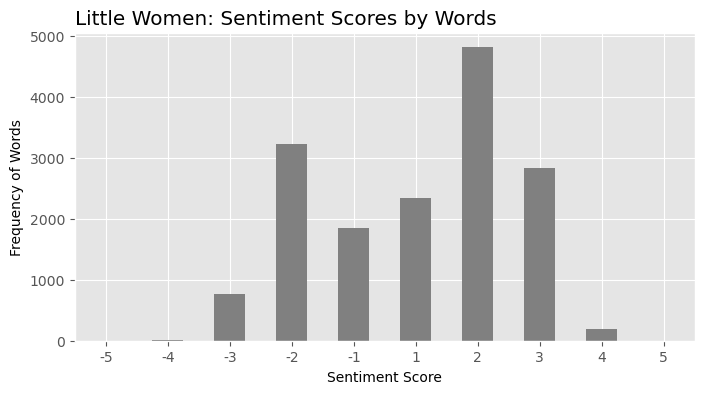

In [119]:
# Task 3 Part 2
score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=True,
    color='gray')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency of Words')
plt.title('Little Women: Sentiment Scores by Words', loc='left')
plt.xticks(rotation=0)

In [116]:
# Task 4
score_acc = df.groupby(df_line // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

score_acc.head(10)

score
section          
0        0.020408
1        0.362745
2        0.619565
3        0.500000
4        0.871795
5        0.823529
6        0.512821
7        1.082353
8        0.041667
9        0.816092

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175')])

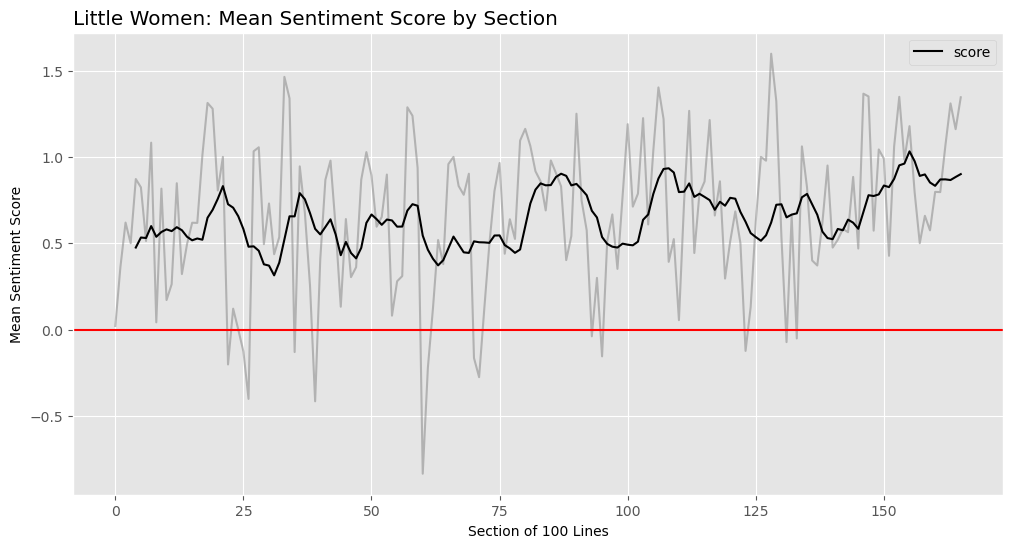

In [118]:
# Part 5
ax = score_acc.plot.line(legend=False, figsize=(12, 6), grid=True, alpha=0.5, color='gray')
score_acc.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='black')
plt.xlabel('Section of 100 Lines')
plt.ylabel('Mean Sentiment Score')
plt.title('Little Women: Mean Sentiment Score by Section', loc='left')
plt.axhline(0, color='red')
plt.xticks(rotation=0)